# 1. Data cleaning / prepping

Summary: we explore the data set, data types, and then proceed with some cleaning and converting data types into either numerical or categorical. Some categorical data types can have multiple fields, so we further standardized them.

In [48]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('vp-data.csv')

# Display the first few rows of the DataFrame
print(data.head())

# Display basic information about the DataFrame
print(data.info())

# Display summary statistics of the DataFrame
print(data.describe())

  yearRegister  gender majorityStatus  isForcedLabour  isSexualExploit  \
0          NaN  Female          Adult             1.0              NaN   
1          NaN  Female          Adult             1.0              NaN   
2          NaN  Female          Adult             1.0              NaN   
3          NaN  Female          Adult             1.0              NaN   
4          NaN  Female          Adult             1.0              NaN   

  UN_COO_Region UN_COE_Region  IP_Exploiter    IP_Gender IP_ageBroad  \
0        Europe        Europe           1.0  Female;Male         NaN   
1        Europe        Europe           1.0  Female;Male         NaN   
2        Europe        Europe           1.0  Female;Male         NaN   
3        Europe        Europe           1.0  Female;Male         NaN   
4        Europe        Europe           1.0  Female;Male         NaN   

  IP_citizen_UNRegion           IP_Relation IP_PayMoney  IP_RecruiterBroker  \
0              Europe  StrangerUnknownOther

In [49]:
# Print unique values for each column in the dataset
for col in data.columns:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}\n")


Unique values in column 'yearRegister': [nan '2014-2018' '2019' '2020' '2021-2022' '2005-2013']

Unique values in column 'gender': ['Female' 'Male' nan]

Unique values in column 'majorityStatus': ['Adult' nan 'Minor']

Unique values in column 'isForcedLabour': [ 1. nan]

Unique values in column 'isSexualExploit': [nan  1.]

Unique values in column 'UN_COO_Region': ['Europe' 'Asia' 'Africa' nan 'Americas/Oceania']

Unique values in column 'UN_COE_Region': ['Europe' 'Asia' nan 'Africa' 'Americas/Oceania']

Unique values in column 'IP_Exploiter': [ 1. nan]

Unique values in column 'IP_Gender': ['Female;Male' 'Male' 'Female' nan]

Unique values in column 'IP_ageBroad': [nan '30--38' '39--47' '0--29' '48+' '30--38;39--47' '39--47;48+'
 '0--29;39--47' '0--29;30--38' '30--38;48+']

Unique values in column 'IP_citizen_UNRegion': ['Europe' 'Asia' nan 'Africa' 'Africa;Asia' 'Asia;Europe'
 'Americas/Oceania' 'Africa;Americas/Oceania' 'Americas/Oceania;Europe'
 'Americas/Oceania;Asia']

Unique val

### Victim Demographics

In [50]:
# Count cases by gender
gender_counts = data['gender'].value_counts()
print("Counts by Gender:")
print(gender_counts)

# Count cases by majority status (minor or adult)
majority_status_counts = data['majorityStatus'].value_counts()
print("\nCounts by Majority Status:")
print(majority_status_counts)

# Count cases by exploitation type
forced_labour_counts = data['isForcedLabour'].value_counts()
sexual_exploit_counts = data['isSexualExploit'].value_counts()
print("\nCounts by Exploitation Type:")
print("\n Forced Labour:")
print(forced_labour_counts)
print("\n Sexual Exploitation:")
print(sexual_exploit_counts)


Counts by Gender:
gender
Female    9589
Male      7995
Name: count, dtype: int64

Counts by Majority Status:
majorityStatus
Adult    16379
Minor     1212
Name: count, dtype: int64

Counts by Exploitation Type:

 Forced Labour:
isForcedLabour
1.0    12248
Name: count, dtype: int64

 Sexual Exploitation:
isSexualExploit
1.0    2775
Name: count, dtype: int64


### Count Perpetrator Roles

In [51]:
# Count cases by perpetrator roles
recruiter_counts = data['IP_RecruiterBroker'].value_counts()
abuse_counts = data['IP_ControlAbuseKidnap'].value_counts()
exploiter_counts = data['IP_Exploiter'].value_counts()

print("\nCounts by Perpetrator Roles:")
print("Recruiters/Brokers:")
print(recruiter_counts)
print("\n Abuse/Kidnap:")
print(abuse_counts)
print("\n Exploiters:")
print(exploiter_counts)



Counts by Perpetrator Roles:
Recruiters/Brokers:
IP_RecruiterBroker
1.0    11865
Name: count, dtype: int64

 Abuse/Kidnap:
IP_ControlAbuseKidnap
1.0    2078
Name: count, dtype: int64

 Exploiters:
IP_Exploiter
1.0    9458
Name: count, dtype: int64


### Regional Distribution

In [52]:
# Count cases by exploitation region (UN_COE_Region)
exploitation_region_counts = data['UN_COE_Region'].value_counts()
print("\nCounts by Exploitation Region:")
print(exploitation_region_counts)

# Count cases by victim citizenship region (UN_COO_Region)
citizenship_region_counts = data['UN_COO_Region'].value_counts()
print("\nCounts by Victim Citizenship Region:")
print(citizenship_region_counts)


Counts by Exploitation Region:
UN_COE_Region
Europe              6432
Asia                6281
Africa              4271
Americas/Oceania     212
Name: count, dtype: int64

Counts by Victim Citizenship Region:
UN_COO_Region
Asia                6139
Europe              5887
Africa              5282
Americas/Oceania     277
Name: count, dtype: int64


Checking empty columns

In [53]:
# Calculate the number of missing values for each column
missing_count = data.isnull().sum()

# Calculate the percentage of missing values for each column
total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100

# Combine the results into a DataFrame for easy visualization
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Display the results
print(missing_summary)

# Optional: Save to a CSV for review
missing_summary.to_csv('missing_values_summary.csv')


                       Missing Count  Missing Percentage
IP_ControlAbuseKidnap          19117           90.195801
isSexualExploit                18420           86.907289
IP_ageBroad                    17993           84.892663
IP_TransactionProcess          13851           65.350318
IP_Exploiter                   11737           55.376268
IP_RecruiterBroker              9330           44.019816
isForcedLabour                  8947           42.212786
IP_citizen_UNRegion             6946           32.771880
IP_Relation                     6623           31.247936
IP_PayMoney                     6040           28.497287
IP_Gender                       5408           25.515452
UN_COE_Region                   3999           18.867657
yearRegister                    3655           17.244633
gender                          3611           17.037037
UN_COO_Region                   3610           17.032319
majorityStatus                  3604           17.004010


In [54]:
# List of binary columns identified from the codebook and dictionary
binary_columns = [
    'isForcedLabour', 'isSexualExploit', 'IP_RecruiterBroker', 
    'IP_TransactionProcess', 'IP_ControlAbuseKidnap', 'IP_Exploiter', 
    'IP_PayMoney'
]

# Print unique values for each binary column
for col in binary_columns:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'isForcedLabour': [ 1. nan]
Unique values in column 'isSexualExploit': [nan  1.]
Unique values in column 'IP_RecruiterBroker': [ 1. nan]
Unique values in column 'IP_TransactionProcess': [ 1. nan]
Unique values in column 'IP_ControlAbuseKidnap': [ 1. nan]
Unique values in column 'IP_Exploiter': [ 1. nan]
Unique values in column 'IP_PayMoney': ['No;Yes' 'No' 'Yes' nan]


Converting null values to 0

In [55]:

# Replace NaN values with 0 in these binary columns
data[binary_columns] = data[binary_columns].fillna(0)

# Verify the transformation
print(data[binary_columns].isnull().sum())  # Should print 0 for all listed columns


isForcedLabour           0
isSexualExploit          0
IP_RecruiterBroker       0
IP_TransactionProcess    0
IP_ControlAbuseKidnap    0
IP_Exploiter             0
IP_PayMoney              0
dtype: int64


Checking unique values for these columns. Some may have 'yes' or 'no' instead of 1 or 0 -- or some other values. need to ensure data is clean/handled properly

In [56]:
# Print unique values for each binary column
for col in binary_columns:
    unique_values = data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'isForcedLabour': [1. 0.]
Unique values in column 'isSexualExploit': [0. 1.]
Unique values in column 'IP_RecruiterBroker': [1. 0.]
Unique values in column 'IP_TransactionProcess': [1. 0.]
Unique values in column 'IP_ControlAbuseKidnap': [1. 0.]
Unique values in column 'IP_Exploiter': [1. 0.]
Unique values in column 'IP_PayMoney': ['No;Yes' 'No' 'Yes' 0]


In [57]:
# Standardize the IP_PayMoney column with explicit type conversion
data['IP_PayMoney'] = data['IP_PayMoney'].replace({
    'No': 0,
    'Yes': 1,
    'No;Yes': 1
}).astype(int)  # Explicitly cast to integer type


/tmp/ipykernel_53562/3551652792.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['IP_PayMoney'] = data['IP_PayMoney'].replace({


In [58]:
# Display the data type of each field in the DataFrame
print(data.dtypes)

yearRegister              object
gender                    object
majorityStatus            object
isForcedLabour           float64
isSexualExploit          float64
UN_COO_Region             object
UN_COE_Region             object
IP_Exploiter             float64
IP_Gender                 object
IP_ageBroad               object
IP_citizen_UNRegion       object
IP_Relation               object
IP_PayMoney                int64
IP_RecruiterBroker       float64
IP_TransactionProcess    float64
IP_ControlAbuseKidnap    float64
dtype: object


In [59]:
# Define the expected data types for each column
dtype_corrections = {
    'yearRegister': 'category',  # Or 'int' if numeric years
    'gender': 'category',
    'majorityStatus': 'category',
    'isForcedLabour': 'int64',
    'isSexualExploit': 'int64',
    'UN_COO_Region': 'category',
    'UN_COE_Region': 'category',
    'IP_Exploiter': 'int64',
    'IP_Gender': 'category',
    'IP_ageBroad': 'category',
    'IP_citizen_UNRegion': 'category',
    'IP_Relation': 'category',
    'IP_PayMoney': 'int64',  # Already correct
    'IP_RecruiterBroker': 'int64',
    'IP_TransactionProcess': 'int64',
    'IP_ControlAbuseKidnap': 'int64'
}

# Apply the type corrections
for col, dtype in dtype_corrections.items():
    if dtype == 'category':
        data[col] = data[col].astype('category')
    elif dtype == 'int64':
        data[col] = data[col].fillna(0).astype('int64')  # Handle NaN for binary columns
    else:
        data[col] = data[col].astype(dtype)

# Verify the changes
print(data.dtypes)


yearRegister             category
gender                   category
majorityStatus           category
isForcedLabour              int64
isSexualExploit             int64
UN_COO_Region            category
UN_COE_Region            category
IP_Exploiter                int64
IP_Gender                category
IP_ageBroad              category
IP_citizen_UNRegion      category
IP_Relation              category
IP_PayMoney                 int64
IP_RecruiterBroker          int64
IP_TransactionProcess       int64
IP_ControlAbuseKidnap       int64
dtype: object


In [60]:
print(data['isForcedLabour'].unique())
print(data['gender'].unique())


[1 0]
['Female', 'Male', NaN]
Categories (2, object): ['Female', 'Male']


In [61]:
# Iterate through all columns
for col in data.columns:
    # Check if the column is categorical
    if data[col].dtype.name == 'category':
        # Add "Unknown" category and replace missing values with "Unknown"
        data[col] = data[col].cat.add_categories('Unknown').fillna('Unknown')

# Verify the changes
for col in data.columns:
    if data[col].dtype.name == 'category':
        print(f"Categories for '{col}': {data[col].cat.categories}")
        print(f"Missing values in '{col}': {data[col].isna().sum()}\n")


Categories for 'yearRegister': Index(['2005-2013', '2014-2018', '2019', '2020', '2021-2022', 'Unknown'], dtype='object')
Missing values in 'yearRegister': 0

Categories for 'gender': Index(['Female', 'Male', 'Unknown'], dtype='object')
Missing values in 'gender': 0

Categories for 'majorityStatus': Index(['Adult', 'Minor', 'Unknown'], dtype='object')
Missing values in 'majorityStatus': 0

Categories for 'UN_COO_Region': Index(['Africa', 'Americas/Oceania', 'Asia', 'Europe', 'Unknown'], dtype='object')
Missing values in 'UN_COO_Region': 0

Categories for 'UN_COE_Region': Index(['Africa', 'Americas/Oceania', 'Asia', 'Europe', 'Unknown'], dtype='object')
Missing values in 'UN_COE_Region': 0

Categories for 'IP_Gender': Index(['Female', 'Female;Male', 'Male', 'Unknown'], dtype='object')
Missing values in 'IP_Gender': 0

Categories for 'IP_ageBroad': Index(['0--29', '0--29;30--38', '0--29;39--47', '30--38', '30--38;39--47',
       '30--38;48+', '39--47', '39--47;48+', '48+', 'Unknown'],
   

In [62]:
print(data['gender'].unique())


['Female', 'Male', 'Unknown']
Categories (3, object): ['Female', 'Male', 'Unknown']


In [63]:
# Check categories or unique values for all columns
for col in data.columns:
    if data[col].dtype.name == 'category':  # For categorical columns
        print(f"Categories for '{col}': {data[col].cat.categories}")
    else:  # For non-categorical columns, display unique values
        print(f"Unique values for '{col}': {data[col].unique()}")
    print("\n")


Categories for 'yearRegister': Index(['2005-2013', '2014-2018', '2019', '2020', '2021-2022', 'Unknown'], dtype='object')


Categories for 'gender': Index(['Female', 'Male', 'Unknown'], dtype='object')


Categories for 'majorityStatus': Index(['Adult', 'Minor', 'Unknown'], dtype='object')


Unique values for 'isForcedLabour': [1 0]


Unique values for 'isSexualExploit': [0 1]


Categories for 'UN_COO_Region': Index(['Africa', 'Americas/Oceania', 'Asia', 'Europe', 'Unknown'], dtype='object')


Categories for 'UN_COE_Region': Index(['Africa', 'Americas/Oceania', 'Asia', 'Europe', 'Unknown'], dtype='object')


Unique values for 'IP_Exploiter': [1 0]


Categories for 'IP_Gender': Index(['Female', 'Female;Male', 'Male', 'Unknown'], dtype='object')


Categories for 'IP_ageBroad': Index(['0--29', '0--29;30--38', '0--29;39--47', '30--38', '30--38;39--47',
       '30--38;48+', '39--47', '39--47;48+', '48+', 'Unknown'],
      dtype='object')


Categories for 'IP_citizen_UNRegion': Index(['Africa'

In [64]:
# Check categories, unique values, and NAs for all columns
for col in data.columns:
    print(f"Column: '{col}'")
    
    # Check for NAs
    na_count = data[col].isna().sum()
    na_percentage = (na_count / len(data)) * 100
    print(f"  Missing values: {na_count} ({na_percentage:.2f}%)")
    
    # Check categories or unique values
    if data[col].dtype.name == 'category':  # For categorical columns
        print(f"  Categories: {data[col].cat.categories}")
    else:  # For non-categorical columns
        print(f"  Unique values: {data[col].unique()}")
    
    print("\n")


Column: 'yearRegister'
  Missing values: 0 (0.00%)
  Categories: Index(['2005-2013', '2014-2018', '2019', '2020', '2021-2022', 'Unknown'], dtype='object')


Column: 'gender'
  Missing values: 0 (0.00%)
  Categories: Index(['Female', 'Male', 'Unknown'], dtype='object')


Column: 'majorityStatus'
  Missing values: 0 (0.00%)
  Categories: Index(['Adult', 'Minor', 'Unknown'], dtype='object')


Column: 'isForcedLabour'
  Missing values: 0 (0.00%)
  Unique values: [1 0]


Column: 'isSexualExploit'
  Missing values: 0 (0.00%)
  Unique values: [0 1]


Column: 'UN_COO_Region'
  Missing values: 0 (0.00%)
  Categories: Index(['Africa', 'Americas/Oceania', 'Asia', 'Europe', 'Unknown'], dtype='object')


Column: 'UN_COE_Region'
  Missing values: 0 (0.00%)
  Categories: Index(['Africa', 'Americas/Oceania', 'Asia', 'Europe', 'Unknown'], dtype='object')


Column: 'IP_Exploiter'
  Missing values: 0 (0.00%)
  Unique values: [1 0]


Column: 'IP_Gender'
  Missing values: 0 (0.00%)
  Categories: Index(['Fe

In [70]:
# Split multi-value categories into separate binary columns
split_columns = ['IP_ageBroad', 'IP_citizen_UNRegion', 'IP_Relation']

for col in split_columns:
    expanded = data[col].str.get_dummies(sep=';')
    data = pd.concat([data, expanded], axis=1)


In [68]:
print(data.dtypes)

yearRegister             category
gender                   category
majorityStatus           category
isForcedLabour              int64
isSexualExploit             int64
UN_COO_Region            category
UN_COE_Region            category
IP_Exploiter                int64
IP_Gender                category
IP_ageBroad              category
IP_citizen_UNRegion      category
IP_Relation              category
IP_PayMoney                 int64
IP_RecruiterBroker          int64
IP_TransactionProcess       int64
IP_ControlAbuseKidnap       int64
0--29                       int64
30--38                      int64
39--47                      int64
48+                         int64
Unknown                     int64
Africa                      int64
Americas/Oceania            int64
Asia                        int64
Europe                      int64
Unknown                     int64
FamilyIntimatePartner       int64
FriendAcquaintance          int64
StrangerUnknownOther        int64
Unknown       

In [69]:
data.to_csv('cleaned_vp-data.csv', index=False)


# 2. Data Exploration

1. Demographic Insights

    Objective: Understand the distribution of victims across demographics like gender, majority status, and regions.
    
    Steps:
        Count and visualize victims by gender, majorityStatus, UN_COO_Region (region of citizenship), and UN_COE_Region (region of exploitation).

        
    Insights:
        Identify which regions report the highest trafficking activity.
        Observe whether minors or adults are more likely to be trafficked in specific contexts.

<Axes: title={'center': 'Victim Gender Distribution'}, xlabel='Gender', ylabel='Count'>

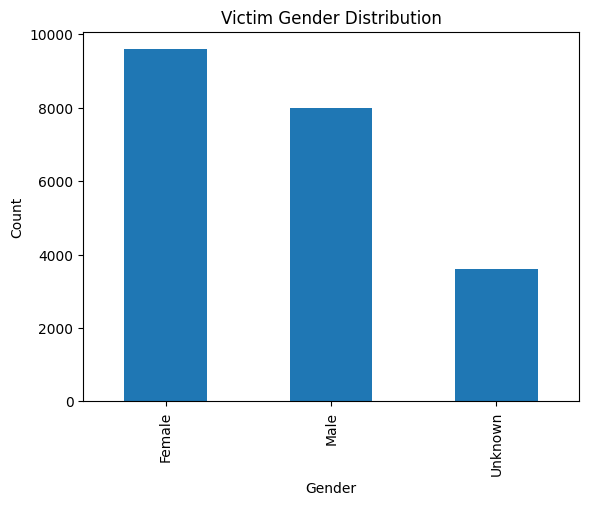

In [ ]:
# Count and visualize gender distribution
gender_counts = data['gender'].value_counts()
gender_counts.plot(kind='bar', title='Victim Gender Distribution', ylabel='Count', xlabel='Gender')

<Axes: title={'center': 'Victim Gender Distribution (%)'}, ylabel='count'>

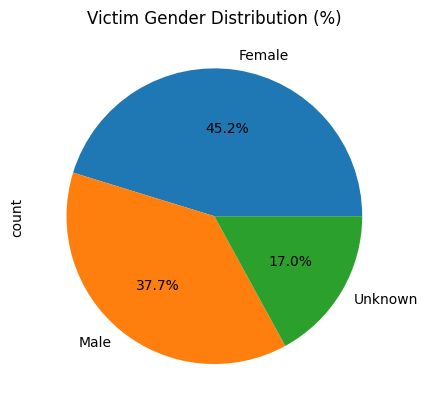

In [76]:
gender_counts.plot(kind='pie', title='Victim Gender Distribution (%)', autopct='%1.1f%%')

<Axes: title={'center': 'Victim Majority Status Distribution'}, ylabel='count'>

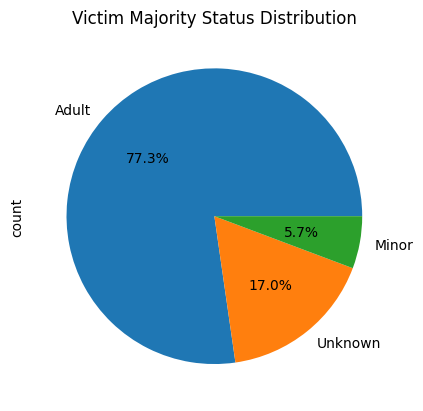

In [73]:
# Majority status distribution
majority_counts = data['majorityStatus'].value_counts()
majority_counts.plot(kind='pie', autopct='%1.1f%%', title='Victim Majority Status Distribution')

<Axes: title={'center': 'Region of Exploitation'}, xlabel='Region', ylabel='Count'>

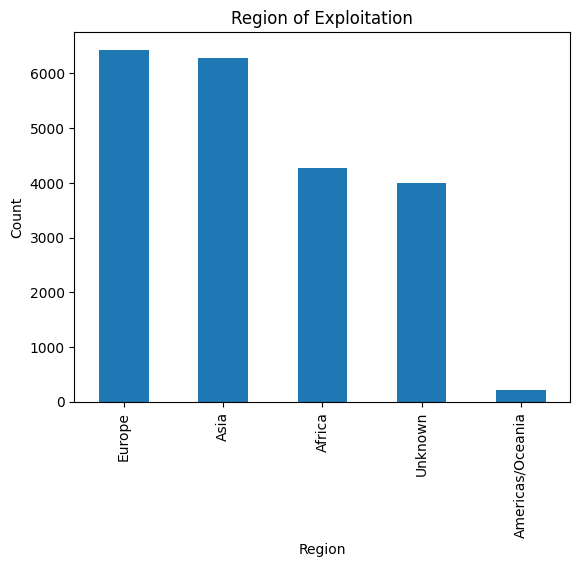

In [74]:
# Regional exploitation trends
region_counts = data['UN_COE_Region'].value_counts()
region_counts.plot(kind='bar', title='Region of Exploitation', ylabel='Count', xlabel='Region')

2. Victim-Perpetrator Relationship Analysis

    Objective: Explore how perpetrator relationships (IP_Relation) influence exploitation types.

    Steps:
        Cross-tabulate IP_Relation with isForcedLabour and isSexualExploit.
        Analyze whether family/intimate partners differ significantly from strangers or acquaintances in terms of exploitation.

        
    Insights:
        Highlight relationships most commonly linked to specific types of exploitation.

isForcedLabour                                 0     1
IP_Relation                                           
FamilyIntimatePartner                        506   461
FamilyIntimatePartner;FriendAcquaintance       6     0
FamilyIntimatePartner;StrangerUnknownOther    35    38
FriendAcquaintance                          1548  3069
FriendAcquaintance;StrangerUnknownOther      153   435
StrangerUnknownOther                        2255  6066
Unknown                                     4444  2179
isSexualExploit                                0     1
IP_Relation                                           
FamilyIntimatePartner                        767   200
FamilyIntimatePartner;FriendAcquaintance       6     0
FamilyIntimatePartner;StrangerUnknownOther    73     0
FriendAcquaintance                          3790   827
FriendAcquaintance;StrangerUnknownOther      570    18
StrangerUnknownOther                        7728   593
Unknown                                     5486  1137


<Axes: title={'center': 'Sexual Exploitation by Perpetrator Relationship'}, xlabel='IP_Relation'>

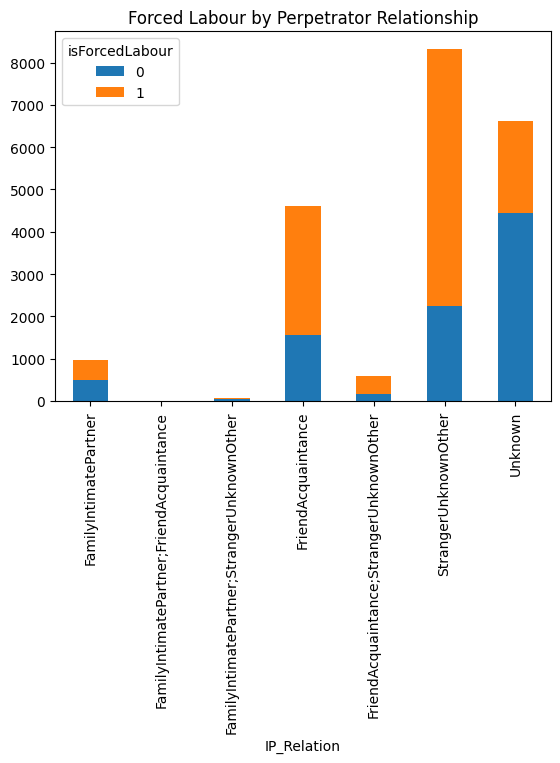

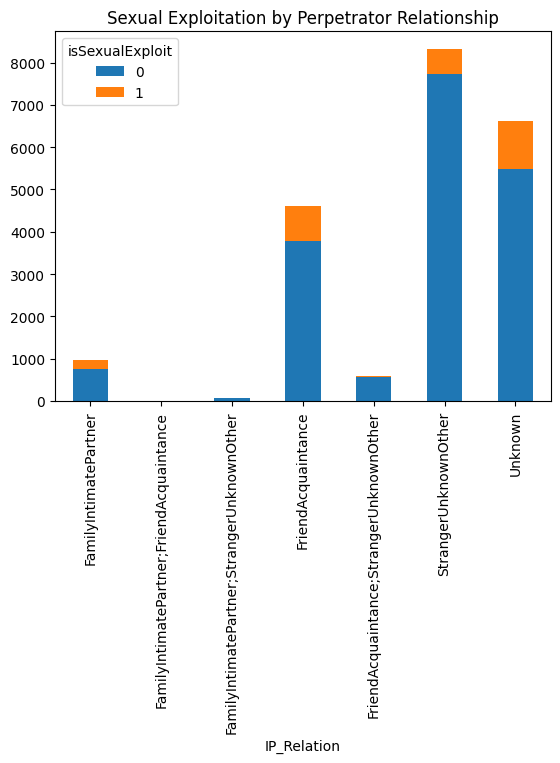

In [77]:
# Cross-tabulation of IP_Relation and exploitation types
relation_forced_labour = pd.crosstab(data['IP_Relation'], data['isForcedLabour'])
relation_sexual_exploit = pd.crosstab(data['IP_Relation'], data['isSexualExploit'])

# Display the results
print(relation_forced_labour)
print(relation_sexual_exploit)

# Optional: Plot results
relation_forced_labour.plot(kind='bar', stacked=True, title='Forced Labour by Perpetrator Relationship')
relation_sexual_exploit.plot(kind='bar', stacked=True, title='Sexual Exploitation by Perpetrator Relationship')


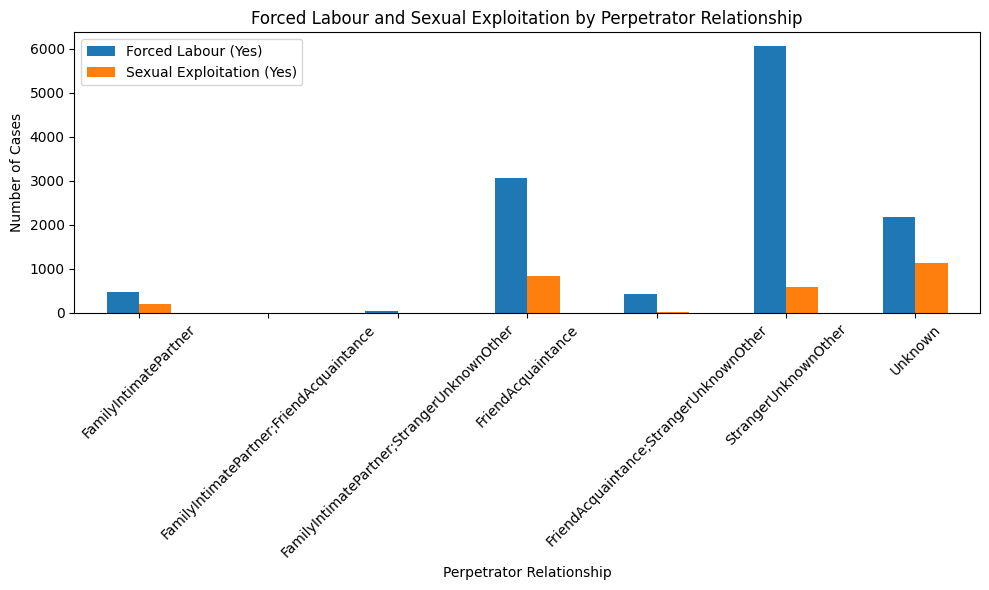

In [97]:
# Plot only 'Yes' values (1)
import matplotlib.pyplot as plt

# Filter data to include only 'Yes' cases (1) for Forced Labour and Sexual Exploitation
relation_forced_labour_yes = pd.crosstab(data['IP_Relation'], data['isForcedLabour'])[1]
relation_sexual_exploit_yes = pd.crosstab(data['IP_Relation'], data['isSexualExploit'])[1]

# Create a combined DataFrame for easier plotting
relation_combined = pd.DataFrame({
    'Forced Labour (Yes)': relation_forced_labour_yes,
    'Sexual Exploitation (Yes)': relation_sexual_exploit_yes
})

# Plot results
relation_combined.plot(kind='bar', stacked=False, figsize=(10, 6), title='Forced Labour and Sexual Exploitation by Perpetrator Relationship')
plt.xlabel('Perpetrator Relationship')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Exploitation Type Trends

    Objective: Analyze how forced labor and sexual exploitation differ by:
        Victim demographics (e.g., gender, majorityStatus).
        Regions (UN_COO_Region, UN_COE_Region).

    Steps:
        Group data by these variables and calculate proportions for isForcedLabour and isSexualExploit.
        
    Insights:
        Identify demographic groups or regions more prone to specific types of exploitation.

         isForcedLabour  isSexualExploit
gender                                  
Female         0.579205         0.239128
Male           0.706942         0.005128
Unknown        0.288563         0.122127
                  isForcedLabour  isSexualExploit
UN_COE_Region                                    
Africa                  0.317022         0.201358
Americas/Oceania        0.273585         0.207547
Asia                    0.677281         0.121796
Europe                  0.741760         0.077892
Unknown                 0.452863         0.151288


/tmp/ipykernel_53562/497667744.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_exploitation = data.groupby('gender')[['isForcedLabour', 'isSexualExploit']].mean()
/tmp/ipykernel_53562/497667744.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_exploitation = data.groupby('UN_COE_Region')[['isForcedLabour', 'isSexualExploit']].mean()


<Axes: title={'center': 'Exploitation Trends by Region'}, xlabel='Region', ylabel='Proportion'>

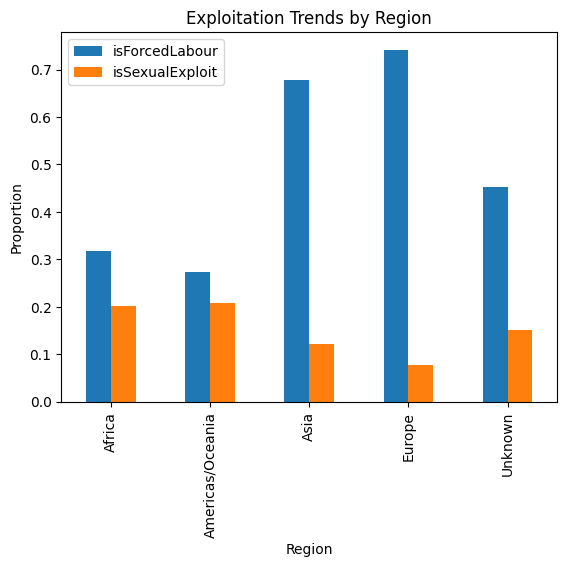

In [78]:
# Group by gender and exploitation type
gender_exploitation = data.groupby('gender')[['isForcedLabour', 'isSexualExploit']].mean()
print(gender_exploitation)

# Group by region and exploitation type
region_exploitation = data.groupby('UN_COE_Region')[['isForcedLabour', 'isSexualExploit']].mean()
print(region_exploitation)

# Plot regional exploitation trends
region_exploitation.plot(kind='bar', title='Exploitation Trends by Region', ylabel='Proportion', xlabel='Region')


4. Perpetrator Roles and Actions

    Objective: Explore how perpetrator roles (e.g., IP_RecruiterBroker, IP_Exploiter) and actions (IP_ControlAbuseKidnap) correlate with victim outcomes.

    Steps:
        Analyze the prevalence of perpetrator roles/actions across cases.
        Cross-tabulate these roles with exploitation types.

    Insights:
        Understand which perpetrator roles are most associated with forced labor or sexual exploitation.

isSexualExploit         0     1
IP_RecruiterBroker             
0                    8003  1327
1                   10417  1448


<Axes: title={'center': 'Sexual Exploitation by Recruiter Role'}, xlabel='IP_RecruiterBroker'>

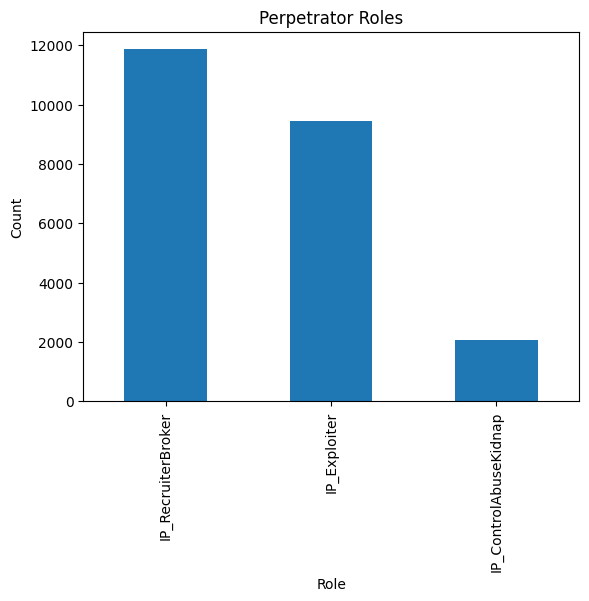

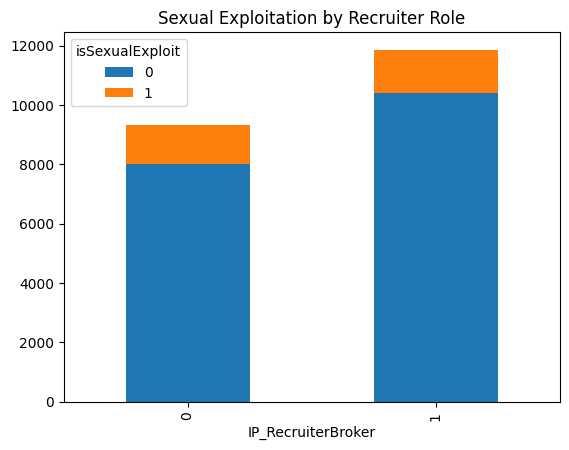

In [79]:
# Count perpetrator roles
role_counts = data[['IP_RecruiterBroker', 'IP_Exploiter', 'IP_ControlAbuseKidnap']].sum()
role_counts.plot(kind='bar', title='Perpetrator Roles', ylabel='Count', xlabel='Role')

# Role and exploitation type cross-tabulation
role_exploitation = pd.crosstab(data['IP_RecruiterBroker'], data['isSexualExploit'])
print(role_exploitation)

# Visualize cross-tabulation
role_exploitation.plot(kind='bar', stacked=True, title='Sexual Exploitation by Recruiter Role')


5. Temportal Trends


<Axes: title={'center': 'Trafficking Cases Over Time'}, xlabel='Year', ylabel='Count'>

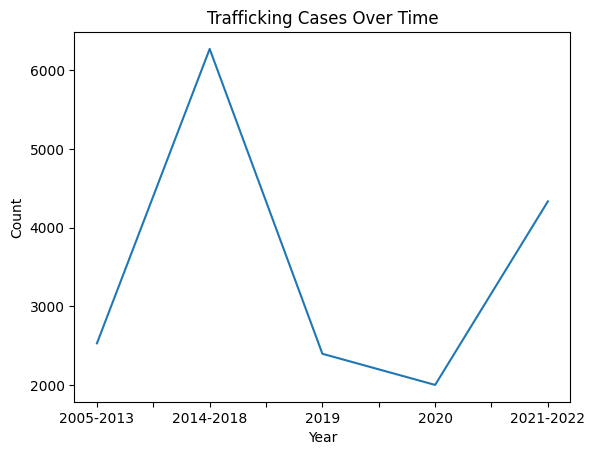

In [82]:
# Temporal trend analysis
# Exclude 'Unknown' from the year counts
year_counts = data['yearRegister'].value_counts().sort_index()
year_counts = year_counts[year_counts.index != 'Unknown']
year_counts.plot(kind='line', title='Trafficking Cases Over Time', ylabel='Count', xlabel='Year')


doesn't really tell us much, as some of these years are grouped together. Don't think temporal analysis is particularly helpful unless we focus on 2019-2022

In [83]:
# Group by region and gender
gender_region = data.groupby(['UN_COE_Region', 'gender']).size().unstack()
print(gender_region)

# Group by region and majority status
majority_region = data.groupby(['UN_COE_Region', 'majorityStatus']).size().unstack()
print(majority_region)


gender            Female  Male  Unknown
UN_COE_Region                          
Africa              2248  1117      906
Americas/Oceania      73    30      109
Asia                3203  2249      829
Europe              2392  3429      611
Unknown             1673  1170     1156
majorityStatus    Adult  Minor  Unknown
UN_COE_Region                          
Africa             3159    228      884
Americas/Oceania     95     17      100
Asia               4983    489      809
Europe             5531    136      765
Unknown            2611    342     1046


/tmp/ipykernel_53562/144802320.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_region = data.groupby(['UN_COE_Region', 'gender']).size().unstack()
/tmp/ipykernel_53562/144802320.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  majority_region = data.groupby(['UN_COE_Region', 'majorityStatus']).size().unstack()


In [85]:
# Calculate exploitation type proportions by region
exploitation_region = data.groupby('UN_COE_Region')[['isForcedLabour', 'isSexualExploit']].mean()
print(exploitation_region)


                  isForcedLabour  isSexualExploit
UN_COE_Region                                    
Africa                  0.317022         0.201358
Americas/Oceania        0.273585         0.207547
Asia                    0.677281         0.121796
Europe                  0.741760         0.077892
Unknown                 0.452863         0.151288


/tmp/ipykernel_53562/1921883932.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exploitation_region = data.groupby('UN_COE_Region')[['isForcedLabour', 'isSexualExploit']].mean()


In [88]:
# Sum perpetrator actions by region
actions_region = data.groupby('UN_COE_Region')[['IP_ControlAbuseKidnap', 'IP_RecruiterBroker']].sum()
print(actions_region)

                  IP_ControlAbuseKidnap  IP_RecruiterBroker
UN_COE_Region                                              
Africa                              663                1342
Americas/Oceania                      0                  94
Asia                                 95                3643
Europe                              726                4910
Unknown                             594                1876


/tmp/ipykernel_53562/3286205605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  actions_region = data.groupby('UN_COE_Region')[['IP_ControlAbuseKidnap', 'IP_RecruiterBroker']].sum()


In [87]:
# Count relationships by region
relation_region = pd.crosstab(data['UN_COE_Region'], data['IP_Relation'])
print(relation_region)


IP_Relation       FamilyIntimatePartner  \
UN_COE_Region                             
Africa                              280   
Americas/Oceania                      0   
Asia                                293   
Europe                              148   
Unknown                             246   

IP_Relation       FamilyIntimatePartner;FriendAcquaintance  \
UN_COE_Region                                                
Africa                                                   0   
Americas/Oceania                                         0   
Asia                                                     0   
Europe                                                   0   
Unknown                                                  6   

IP_Relation       FamilyIntimatePartner;StrangerUnknownOther  \
UN_COE_Region                                                  
Africa                                                     0   
Americas/Oceania                                           0   
Asia   

Minors

/tmp/ipykernel_53562/3739468834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  minors_exploitation = minors_data.groupby('UN_COE_Region')[['isForcedLabour', 'isSexualExploit']].sum()


                  isForcedLabour  isSexualExploit  Total Exploitation
UN_COE_Region                                                        
Africa                        32               26                  58
Americas/Oceania               2                1                   3
Asia                         248               35                 283
Europe                        33               33                  66
Unknown                      146               46                 192


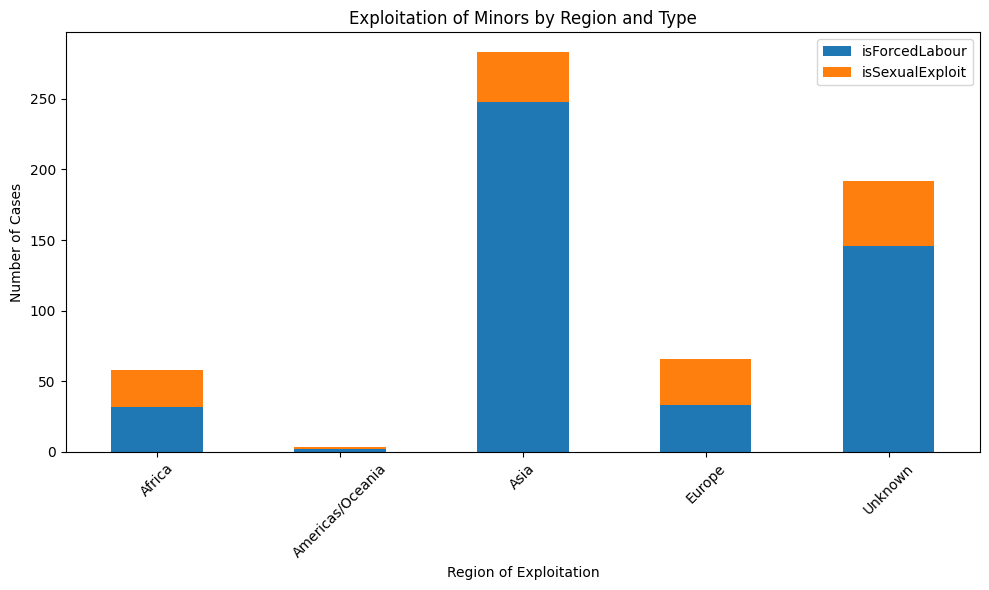

In [98]:
# Filter data for minors only
minors_data = data[data['majorityStatus'] == 'Minor']

# Group by region and exploitation type, summing up cases
minors_exploitation = minors_data.groupby('UN_COE_Region')[['isForcedLabour', 'isSexualExploit']].sum()

# Add a total exploitation column for comparison
minors_exploitation['Total Exploitation'] = minors_exploitation.sum(axis=1)

# Display results
print(minors_exploitation)

# Plot results for better visualization
minors_exploitation[['isForcedLabour', 'isSexualExploit']].plot(
    kind='bar', stacked=True, figsize=(10, 6),
    title='Exploitation of Minors by Region and Type'
)
plt.xlabel('Region of Exploitation')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_53562/2834419043.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  minors_exploitation_by_gender = minors_data.groupby(['UN_COE_Region', 'gender'])[['isForcedLabour', 'isSexualExploit']].sum()


       UN_COE_Region   gender  isForcedLabour  isSexualExploit
0             Africa   Female              19               22
1             Africa     Male               4                0
2             Africa  Unknown               9                4
3   Americas/Oceania   Female               0                1
4   Americas/Oceania     Male               1                0
5   Americas/Oceania  Unknown               1                0
6               Asia   Female             119               33
7               Asia     Male             113                0
8               Asia  Unknown              16                2
9             Europe   Female              18               29
10            Europe     Male               8                0
11            Europe  Unknown               7                4
12           Unknown   Female              62               37
13           Unknown     Male              56                3
14           Unknown  Unknown              28          

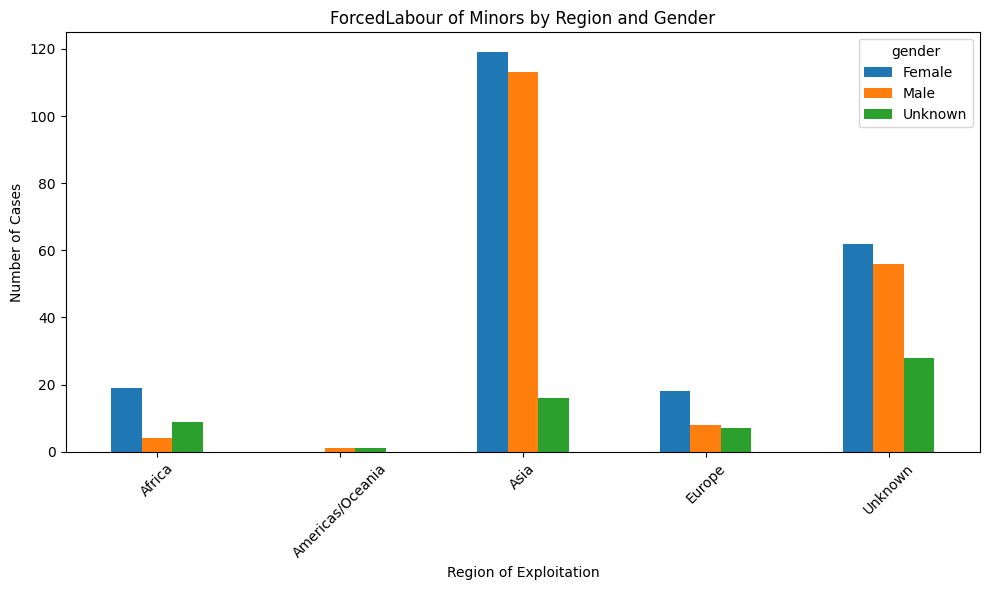

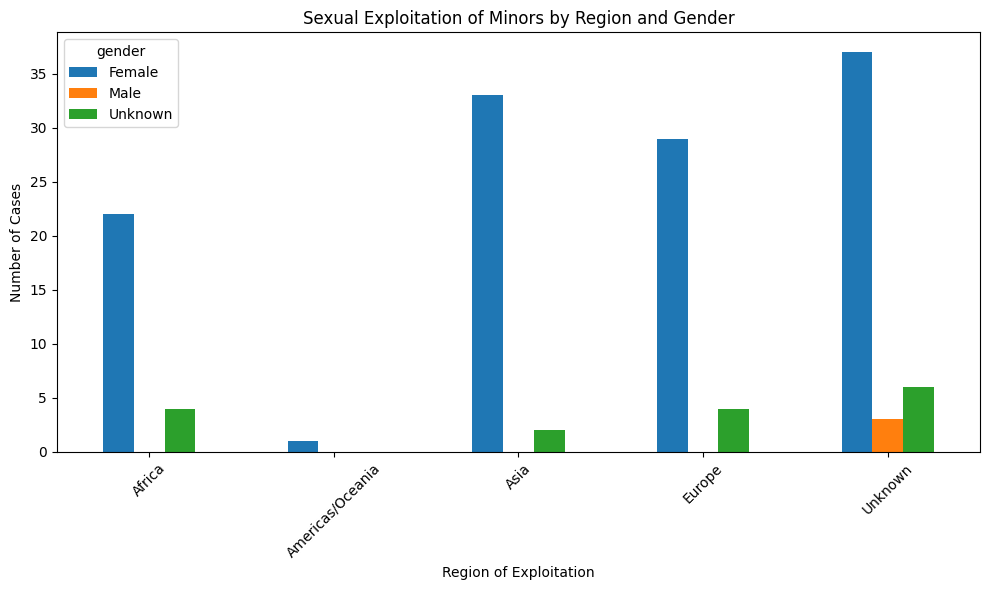

In [99]:
# Filter data for minors only
minors_data = data[data['majorityStatus'] == 'Minor']

# Group by region and gender, summing exploitation types
minors_exploitation_by_gender = minors_data.groupby(['UN_COE_Region', 'gender'])[['isForcedLabour', 'isSexualExploit']].sum()

# Reset index for easier readability
minors_exploitation_by_gender = minors_exploitation_by_gender.reset_index()

# Display results
print(minors_exploitation_by_gender)

# Plot results for better visualization
import matplotlib.pyplot as plt

# Create separate plots for Forced Labour and Sexual Exploitation
for col in ['isForcedLabour', 'isSexualExploit']:
    minors_exploitation_pivot = minors_exploitation_by_gender.pivot(index='UN_COE_Region', columns='gender', values=col)
    minors_exploitation_pivot.plot(
        kind='bar', figsize=(10, 6),
        title=f'{col.replace("is", "").replace("Exploit", " Exploitation")} of Minors by Region and Gender'
    )
    plt.xlabel('Region of Exploitation')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 3. Predictive Modeling

Classification Tasks: Predicting Exploitation Types
1. Predict isForcedLabour or isSexualExploit

Target: Binary classification for isForcedLabour or isSexualExploit.

Features:
* Demographics: gender, majorityStatus.
* Regions: UN_COO_Region, UN_COE_Region.
* Perpetrator roles: IP_Relation, IP_RecruiterBroker, IP_ControlAbuseKidnap.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target
features = ['gender', 'majorityStatus', 'UN_COO_Region', 'IP_Relation', 'IP_RecruiterBroker', 'IP_ControlAbuseKidnap']
X = pd.get_dummies(data[features], drop_first=True)
y = data['isForcedLabour']  # Or 'isSexualExploit'

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.62      0.67      2705
           1       0.75      0.84      0.79      3654

    accuracy                           0.75      6359
   macro avg       0.75      0.73      0.73      6359
weighted avg       0.75      0.75      0.74      6359



2. Multiclass Classification: Predict Exploitation Region

    Target: UN_COE_Region (e.g., Europe, Asia, Africa).
    
    Features:
* Demographics: gender, majorityStatus.
* Exploitation Types: isForcedLabour, isSexualExploit.
* Perpetrator Roles: IP_RecruiterBroker, IP_ControlAbuseKidnap.

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

# Define features and target
features = ['gender', 'majorityStatus', 'isForcedLabour', 'isSexualExploit', 'IP_RecruiterBroker', 'IP_ControlAbuseKidnap']
X = pd.get_dummies(data[features], drop_first=True)
y = data['UN_COE_Region'].astype('category').cat.codes  # Encode regions as numeric

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.38      0.41      1262
           1       0.00      0.00      0.00        69
           2       0.40      0.56      0.47      1904
           3       0.52      0.50      0.51      1898
           4       0.40      0.26      0.32      1226

    accuracy                           0.44      6359
   macro avg       0.35      0.34      0.34      6359
weighted avg       0.44      0.44      0.43      6359



/home/leo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/leo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/leo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Trying to predict Country of Origin (COO)

In [92]:
# let's try random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
features = ['gender', 'majorityStatus', 'UN_COE_Region', 'isForcedLabour', 'isSexualExploit',
            'IP_Relation', 'IP_RecruiterBroker', 'IP_ControlAbuseKidnap']
X = pd.get_dummies(data[features], drop_first=True)  # Convert categorical features to numeric
y = data['UN_COO_Region'].astype('category').cat.codes  # Encode region of origin as numeric

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1600
           1       0.65      0.49      0.56        86
           2       0.67      0.69      0.68      1856
           3       0.73      0.80      0.77      1750
           4       0.44      0.25      0.32      1067

    accuracy                           0.67      6359
   macro avg       0.63      0.60      0.61      6359
weighted avg       0.65      0.67      0.65      6359

Confusion Matrix:
[[1248    4  170   70  108]
 [   9   42    7   15   13]
 [ 223    3 1281  229  120]
 [  65    4  181 1407   93]
 [ 305   12  281  205  264]]


Trying logistic regresion to guess COO

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
features = ['gender', 'majorityStatus', 'UN_COE_Region', 'isForcedLabour', 'isSexualExploit',
            'IP_Relation', 'IP_RecruiterBroker', 'IP_ControlAbuseKidnap']
X = pd.get_dummies(data[features], drop_first=True)  # Convert categorical features to numeric
y = data['UN_COO_Region'].astype('category').cat.codes  # Encode region of origin as numeric

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/home/leo/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1600
           1       0.77      0.50      0.61        86
           2       0.62      0.72      0.67      1856
           3       0.68      0.86      0.76      1750
           4       0.33      0.09      0.14      1067

    accuracy                           0.65      6359
   macro avg       0.62      0.58      0.57      6359
weighted avg       0.61      0.65      0.61      6359

Confusion Matrix:
[[1139    3  315   76   67]
 [  10   43    4   21    8]
 [ 117    0 1331  331   77]
 [  60    0  136 1511   43]
 [ 312   10  358  292   95]]


In [96]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Retrieve original region names
region_categories = data['UN_COO_Region'].astype('category').cat.categories
region_mapping = dict(enumerate(region_categories))  # Create a mapping from numeric to category names

# Step 2: Replace numeric codes with region names in classification report
print("Classification Report:")
print(classification_report(
    y_test.map(region_mapping),  # Map y_test values back to region names
    pd.Series(y_pred).map(region_mapping)  # Map predicted values back to region names
))

# Step 3: Replace numeric codes with region names in confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_named = pd.DataFrame(
    conf_matrix,
    index=region_categories,  # Use category names for rows
    columns=region_categories  # Use category names for columns
)

print("\nConfusion Matrix:")
print(conf_matrix_named)


Classification Report:
                  precision    recall  f1-score   support

          Africa       0.70      0.71      0.70      1600
Americas/Oceania       0.77      0.50      0.61        86
            Asia       0.62      0.72      0.67      1856
          Europe       0.68      0.86      0.76      1750
         Unknown       0.33      0.09      0.14      1067

        accuracy                           0.65      6359
       macro avg       0.62      0.58      0.57      6359
    weighted avg       0.61      0.65      0.61      6359


Confusion Matrix:
                  Africa  Americas/Oceania  Asia  Europe  Unknown
Africa              1139                 3   315      76       67
Americas/Oceania      10                43     4      21        8
Asia                 117                 0  1331     331       77
Europe                60                 0   136    1511       43
Unknown              312                10   358     292       95
